 This is an  implementation of the Recurrent Neural Network using Keras

<hr id="toc">


In this scrip, I will go through the essential exploratory analysis steps:
1. [Read Data](#Read_Data)
2. [Visualization](#Visualization)
3. [RNN](#Construct_ARX_models)

  3.1. [FeatureEngineering](#Feature_Engineering)
  

In [1]:
import matplotlib.pyplot as plt
import scipy as sp
import sys
import pandas as pd
import numpy as np
import datetime,time
%matplotlib inline

In [2]:
# import my package
sys.path.append(r"C:\Users\Fan\OneDrive - tongji.edu.cn\Project_in_UA\Fan' file\2_UA_Project\ProjectFenestration\2_Model\Control_Oriented_Model\Code\SourceCode")
from Data_Preprocessing import *

#### Global parameters

In [3]:
'''
TimeInterval = '10s' # 10 mins
PredictionHorizon = "24H"
time_lags = [1,2,3,4,5,6,12,60,360,4320,8640]
'''

'\nTimeInterval = \'10s\' # 10 mins\nPredictionHorizon = "24H"\ntime_lags = [1,2,3,4,5,6,12,60,360,4320,8640]\n'

In [4]:
## Some Global Variables

## You need to specify these three parameters everytime!!!
TimeInterval = '10T' # 10 mins
PredictionHorizon = "6H"
time_lags = [1]

In [5]:
workingPath = r"C:\Users\Fan\OneDrive - tongji.edu.cn\Project_in_UA\Fan' file\2_UA_Project\ProjectFenestration\2_Model\Control_Oriented_Model\Data"

# January
workingPath_Jan = r"C:\Users\Fan\OneDrive - tongji.edu.cn\Project_in_UA\Fan' file\2_UA_Project\ProjectFenestration\2_Model\Control_Oriented_Model\Data\Jan_Case"

# July
workingPath_July = r"C:\Users\Fan\OneDrive - tongji.edu.cn\Project_in_UA\Fan' file\2_UA_Project\ProjectFenestration\2_Model\Control_Oriented_Model\Data\July_Case"

In [6]:
FileName = []
FileName.append("Cor_Month.csv")
FileName.append("Sou_Month.csv")
FileName.append("Nor_Month.csv")
FileName.append("Wes_Month.csv")
FileName.append("Eas_Month.csv")

<br id="Read_Data">

### read data
#### Initial Data

<br>
Read data from originald data file, which are not record in even time intervel

In [7]:
data = pd.read_csv(workingPath+"\\One_Month.csv")

#### Q: are all time interval smaller than 10s??

               data
count  40275.000000
mean      14.125909
std       23.397909
min        0.000000
25%        0.000000
50%        0.000000
75%       21.000000
max       60.000000


(60.0, False)

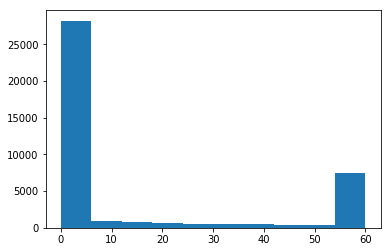

In [8]:
test_max_time_interval(data.iloc[:40276,0])

##### Read weather data

In [9]:
Weather_Data_resampled = read_WeatherData(workingPath+"\\WeatherData.csv")
Weather_Data_resampled.head()

,Dry Bulb Temperature {C},Dew Point Temperature {C},Relative Humidity {%},Atmospheric Pressure {Pa},Extraterrestrial Horizontal Radiation {Wh/m2},Extraterrestrial Direct Normal Radiation {Wh/m2},Horizontal Infrared Radiation Intensity from Sky {Wh/m2},Global Horizontal Radiation {Wh/m2},Direct Normal Radiation {Wh/m2},Diffuse Horizontal Radiation {Wh/m2}
Date,,,,,,,,,,
1970-01-01 00:00:00,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 00:00:10,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 00:00:20,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 00:00:30,-12.2,-16.1,73,99500,0,0,218,0,0,0
1970-01-01 00:00:40,-12.2,-16.1,73,99500,0,0,218,0,0,0


#### data preprocessing: transform the data into evenly sampled

In [10]:
Data_Jan= {}
Data_Jan['Cor'] = pd.read_csv(workingPath_Jan+"\\"+FileName[0],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])
Data_Jan['Sou'] = pd.read_csv(workingPath_Jan+"\\"+FileName[1],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])
Data_Jan['Nor'] = pd.read_csv(workingPath_Jan+"\\"+FileName[2],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])
Data_Jan['Wes'] = pd.read_csv(workingPath_Jan+"\\"+FileName[3],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])
Data_Jan['Eas'] = pd.read_csv(workingPath_Jan+"\\"+FileName[4],parse_dates =[0],
                              date_parser=lambda x:time.strftime("%Y-%m-%d %H:%M:%S",time.gmtime(float(x))),index_col=[0])

In [11]:
Data_Jan_Resampled = {}
for idx, value in Data_Jan.items():
    ## drop duplciates, and back fill nan
    Data_Jan_Resampled[idx] = value.drop_duplicates().bfill()
    Data_Jan_Resampled[idx] = Data_Jan[idx].iloc[0:1,:].append(Data_Jan[idx].iloc[1:,:].resample("10s",label ="right").mean()).bfill()  

In [12]:
## re_read data
data_with_Timestamps_resampled = read_Data(workingPath+"\\One-Month.csv")
data_with_Timestamps_resampled = data_with_Timestamps_resampled.iloc[:100002,:]

FileNotFoundError: [Errno 2] File b"C:\\Users\\Fan\\OneDrive - tongji.edu.cn\\Project_in_UA\\Fan' file\\2_UA_Project\\ProjectFenestration\\2_Model\\Control_Oriented_Model\\Data\\One-Month.csv" does not exist: b"C:\\Users\\Fan\\OneDrive - tongji.edu.cn\\Project_in_UA\\Fan' file\\2_UA_Project\\ProjectFenestration\\2_Model\\Control_Oriented_Model\\Data\\One-Month.csv"

In [139]:
data_with_Timestamps_resampled.head()

,TSupCor.T,flo.temAirPer5.T,VSupCor_flow.V_flow
Time,,,
1970-01-01 00:00:00,293.1500,293.150,1.280000e-12
1970-01-01 00:00:10,293.1890,293.151,1.148720e-03
1970-01-01 00:00:20,293.2900,293.152,1.148240e-03
1970-01-01 00:00:30,293.3675,293.153,1.148230e-03
1970-01-01 00:00:40,293.3800,293.153,1.148230e-03


In [140]:
data_with_Timestamps_resampled.tail()

,TSupCor.T,flo.temAirPer5.T,VSupCor_flow.V_flow
Time,,,
1970-01-12 13:46:10,299.12450,298.743000,2.316175
1970-01-12 13:46:20,299.86218,298.560352,2.187232
1970-01-12 13:46:30,299.86218,298.560352,2.187232
1970-01-12 13:46:40,299.86218,298.560352,2.187232
1970-01-12 13:46:50,299.86218,298.560352,2.187232


<br id ='Visualization'>

### Visualize the data before constructing models

In [141]:
from pandas.plotting import autocorrelation_plot

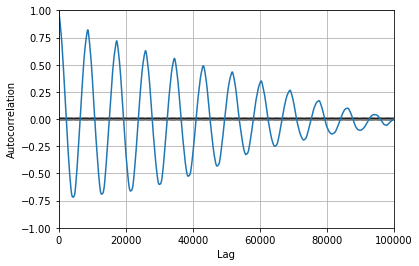

In [142]:
autocorrelation_plot(data_with_Timestamps_resampled.iloc[:,1])

#### Clearly, there is strong seasonality

<br id="Construct_ARX_models">

### construct RNN models 

```flow
 prepare data(normalize)--> training --> Model fitting 
```

Feature Generation
  * Category 1:
     * History data(Autoregressive term)
         1. t-1
     * Exogenous variables
     
| Items| Type  |
|:------:|------|
|1. Outdoor air temperature|numerical|
|2. Solar radiation|numerical|       
|3. Occupant| Categorical(binary)|
|4. Equipment|numerical|
|5. Lighting|numerical|
|6. Supply air temperature|numerical|
|7. Supply air flowrate    |numerical|

         

##### Feature Generation

In [30]:
prediction_horizon_n = int(TimeInterval_Parser(PredictionHorizon)/TimeInterval_Parser(TimeInterval))

In [143]:
data_with_Timestamps_resampled.head()

,TSupCor.T,flo.temAirPer5.T,VSupCor_flow.V_flow
Time,,,
1970-01-01 00:00:00,293.1500,293.150,1.280000e-12
1970-01-01 00:00:10,293.1890,293.151,1.148720e-03
1970-01-01 00:00:20,293.2900,293.152,1.148240e-03
1970-01-01 00:00:30,293.3675,293.153,1.148230e-03
1970-01-01 00:00:40,293.3800,293.153,1.148230e-03


In [144]:
time_lags = [1,36,72]
#[1,2,3,4,5,6,12,18,36,72,144]

In [145]:
data_with_Timestamps_resampled.shape

(100002, 3)

In [146]:
prediction_horizon_n

0

In [147]:
TimeInterval

'10T'

In [148]:
data_with_Timestamps_resampled.shape

(100002, 3)

In [149]:
data_with_Timestamps_resampled.head()

,TSupCor.T,flo.temAirPer5.T,VSupCor_flow.V_flow
Time,,,
1970-01-01 00:00:00,293.1500,293.150,1.280000e-12
1970-01-01 00:00:10,293.1890,293.151,1.148720e-03
1970-01-01 00:00:20,293.2900,293.152,1.148240e-03
1970-01-01 00:00:30,293.3675,293.153,1.148230e-03
1970-01-01 00:00:40,293.3800,293.153,1.148230e-03


In [150]:
data_with_Timestamps_resampled.tail()

,TSupCor.T,flo.temAirPer5.T,VSupCor_flow.V_flow
Time,,,
1970-01-12 13:46:10,299.12450,298.743000,2.316175
1970-01-12 13:46:20,299.86218,298.560352,2.187232
1970-01-12 13:46:30,299.86218,298.560352,2.187232
1970-01-12 13:46:40,299.86218,298.560352,2.187232
1970-01-12 13:46:50,299.86218,298.560352,2.187232


In [29]:
prediction_horizon_n

NameError: name 'prediction_horizon_n' is not defined

In [ ]:
 pre_Process(data_with_Timestamps_resampled,Weather_Data_resampled,TimeInterval,time_lags, prediction_horizon = prediction_horizon_n )

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is dep

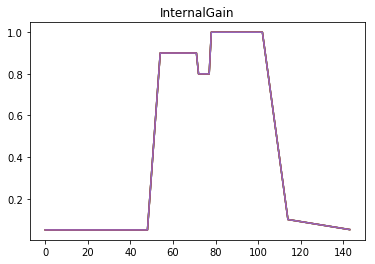

In [67]:
dataSetX_All = {}
dataSetY_All = {}
for idx, value in Data_Jan_Resampled.items():
    dataSetX_All[idx],dataSetY_All[idx] = pre_Process(value,Weather_Data_resampled,TimeInterval,time_lags,prediction_horizon = prediction_horizon_n )

##### feature elimination--colinearity removal

In [14]:
from scipy.stats import pearsonr

In [13]:
featureSet_Cor = ['const', 'TSupCor.T', 'VSupCor_flow.V_flow', 'occup', 'InternalGain',
       'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}']
featureSet_Nor = ['const', 'TSupNor.T', 'VSupNor_flow.V_flow', 'occup', 'InternalGain',
       'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}']
featureSet_Sou = ['const', 'TSupSou.T', 'VSupSou_flow.V_flow', 'occup', 'InternalGain',
       'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}']
featureSet_Eas = ['const', 'TSupEas.T', 'VSupEas_flow.V_flow', 'occup', 'InternalGain',
       'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}']
featureSet_Wes = ['const', 'TSupWes.T', 'VSupWes_flow.V_flow', 'occup', 'InternalGain',
       'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}']

In [17]:
# The guidelines underlying this is: if the correlation coefficient of two variables are higher than threhold value, remove the one that is 
#  reletively irrelavant to Y
def Eliminate_Colinearity(dataSetX_All,dataSetY_All,featureSet,threshold_For_Colinearity = 0.9):
    n = len(featureSet)
    feature_To_Remove_idx,feature_To_Remove = [],[]

    for i,feature in enumerate(featureSet):
        for j in range(i+1,n):
            coeff = pearsonr(dataSetX_All.loc[:,featureSet[i]],dataSetX_All.loc[:,featureSet[j]])[0]
            #print(coeff)
            if coeff: # if not nan
                if coeff >= threshold_For_Colinearity:

                    coef_i = pearsonr(dataSetX_All.loc[:,featureSet[i]].tolist(),dataSetY_All.iloc[:,0].tolist())[0]
                    coef_j = pearsonr(dataSetX_All.loc[:,featureSet[j]].tolist(),dataSetY_All.iloc[:,0].tolist())[0]

                    feature_To_Remove_idx.append(j) if  coef_i>= coef_j else feature_To_Remove_idx.append(i)
                    print(coeff,feature_To_Remove_idx)
                    #print(featureSet[i],featureSet[j],'\n')        
    feature_To_Remove_idx = list(set(feature_To_Remove_idx ))
    print(feature_To_Remove_idx)
    for idx in feature_To_Remove_idx:
        feature_To_Remove.append(featureSet[idx])
    return feature_To_Remove

In [16]:
dataSetX_All[idx].columns

Index(['const', 'TSupEas.T', 'VSupEas_flow.V_flow', 'hist_1', 'occup',
       'InternalGain', 'Dry Bulb Temperature {C}', 'Dew Point Temperature {C}',
       'Relative Humidity {%}', 'Atmospheric Pressure {Pa}',
       'Extraterrestrial Horizontal Radiation {Wh/m2}',
       'Extraterrestrial Direct Normal Radiation {Wh/m2}',
       'Horizontal Infrared Radiation Intensity from Sky {Wh/m2}',
       'Global Horizontal Radiation {Wh/m2}',
       'Direct Normal Radiation {Wh/m2}',
       'Diffuse Horizontal Radiation {Wh/m2}'],
      dtype='object')

In [18]:
featureSet_No_Colinear = {}
featureSet = {}
for idx, value in Data_Jan_Resampled.items():
    featureSet[idx] = list(dataSetX_All[idx].columns)
    feature_To_Remove = Eliminate_Colinearity(dataSetX_All[idx],dataSetY_All[idx],featureSet[idx])
    featureSet_No_Colinear[idx] = featureSet[idx].copy()
    for feature in feature_To_Remove:  
        featureSet_No_Colinear[idx].remove(feature)

0.9529734572564115 [7]
0.9207113073839543 [7, 12]
0.9287532886989912 [7, 12, 7]
0.9134073366960919 [7, 12, 7, 13]
0.9297987508939727 [7, 12, 7, 13, 15]
[15, 12, 13, 7]
0.9529734572564115 [7]
0.9207113073839543 [7, 12]
0.9287532886989912 [7, 12, 12]
0.9134073366960919 [7, 12, 12, 13]
0.9297987508939727 [7, 12, 12, 13, 15]
[15, 12, 13, 7]
0.9529734572564115 [7]
0.9207113073839543 [7, 12]
0.9287532886989912 [7, 12, 12]
0.9134073366960919 [7, 12, 12, 13]
0.9297987508939727 [7, 12, 12, 13, 15]
[15, 12, 13, 7]
0.9529734572564115 [7]
0.9207113073839543 [7, 12]
0.9287532886989912 [7, 12, 7]
0.9134073366960919 [7, 12, 7, 13]
0.9297987508939727 [7, 12, 7, 13, 15]
[15, 12, 13, 7]
0.9529734572564115 [7]
0.9207113073839543 [7, 12]
0.9287532886989912 [7, 12, 7]
0.9134073366960919 [7, 12, 7, 13]
0.9297987508939727 [7, 12, 7, 13, 15]
[15, 12, 13, 7]


In [69]:
dataSetY_All[idx].head()

,flo.temAirEas.T,future_1,future_2,future_3,future_4,future_5,future_6,future_7,future_8,future_9,...,future_27,future_28,future_29,future_30,future_31,future_32,future_33,future_34,future_35,future_36
Time,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:10:00,292.351167,292.244233,292.173367,292.118267,292.070600,292.028400,291.991267,291.958167,291.928800,291.902000,...,291.346733,291.317500,291.291267,291.265100,291.237600,292.311817,293.997422,294.805367,294.897292,294.685200
1970-01-01 00:20:00,292.244233,292.173367,292.118267,292.070600,292.028400,291.991267,291.958167,291.928800,291.902000,291.875400,...,291.317500,291.291267,291.265100,291.237600,292.311817,293.997422,294.805367,294.897292,294.685200,294.994667
1970-01-01 00:30:00,292.173367,292.118267,292.070600,292.028400,291.991267,291.958167,291.928800,291.902000,291.875400,291.847533,...,291.291267,291.265100,291.237600,292.311817,293.997422,294.805367,294.897292,294.685200,294.994667,294.918392
1970-01-01 00:40:00,292.118267,292.070600,292.028400,291.991267,291.958167,291.928800,291.902000,291.875400,291.847533,291.820667,...,291.265100,291.237600,292.311817,293.997422,294.805367,294.897292,294.685200,294.994667,294.918392,294.866250
1970-01-01 00:50:00,292.070600,292.028400,291.991267,291.958167,291.928800,291.902000,291.875400,291.847533,291.820667,291.796167,...,291.237600,292.311817,293.997422,294.805367,294.897292,294.685200,294.994667,294.918392,294.866250,295.052400


##### Prototype Model
Here we will try to build an LSTM model using keras

In [21]:
from keras.models import Sequential
from keras.layers import Input,Dense,LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

Using Theano backend.


 **Prepare data for LSTM**

In [163]:
dataSetX_All_Copy = dataSetX_All.copy()

In [164]:
'''
# reshape input to be 3D[samples, timesteps, features]
train_X = data_x_train.reshape([data_x_train.shape[0],1,data_x_train.shape[1]])
test_X = data_x_test.reshape([data_x_test.shape[0],1,data_x_test.shape[1]])
print(train_X.shape,test_X.shape, train_Y.shape,test_Y.shape)
'''

'\n# reshape input to be 3D[samples, timesteps, features]\ntrain_X = data_x_train.reshape([data_x_train.shape[0],1,data_x_train.shape[1]])\ntest_X = data_x_test.reshape([data_x_test.shape[0],1,data_x_test.shape[1]])\nprint(train_X.shape,test_X.shape, train_Y.shape,test_Y.shape)\n'

In [34]:
def data_Prepare4RNN(dataSetX_All,dataSetY_All):
    # normalize data
    scaler = MinMaxScaler(feature_range=(0,1))

    data_X = scaler.fit_transform(dataSetX_All.values)
    data_Y = scaler.fit_transform(dataSetY_All.values)

    ## split data into train set and test set
    l = len(data_X)
    data_x_train,data_x_test = data_X[:int(4*l/5),:], data_X[int(4*l/5):,:]
    train_Y,test_Y = data_Y[:int(4*l/5),:], data_Y[int(4*l/5):,:]
    return data_x_train,data_x_test,train_Y,test_Y,data_Y 

In [24]:
# design network
def fit_lstm(train_x,train_y, params):
    # reshape input to be 3D[samples, timesteps, features]
    train_x = train_x.reshape(train_x.shape[0],1,train_x.shape[1])
  
    # design network
    model = Sequential()
    model.add(LSTM(params['n_neurons'],input_shape=(train_x.shape[1],train_x.shape[2]),stateful = False))
    model.add(Dense(train_y.shape[1]))
    
    model.compile(loss = params['loss'],optimizer = params['optimizer'])
    
    #fit network
    history = model.fit(train_x,train_y,epochs=params['epochs'],
                        batch_size=params['batch_size'],verbose=0,shuffle=False,validation_split =0.2)
    return model,history

# make one forecast with an LSTM,
def forecast_lstm(model, X, n_batch=1):
    # reshape input pattern to [samples, timesteps, features]
    X = X.reshape(1, 1, len(X))
    # make forecast
    forecast = model.predict(X, batch_size=n_batch)
    # convert to array
    return [x for x in forecast[0, :]]

def make_forecast(model,test_x,n_batch=1):
    forecasts = []
    #make forecast
    for x in test_x:
        forecast = forecast_lstm(model,x,n_batch)
        forecasts.append(forecast)
    return forecasts

In [25]:
params = {
    'n_neurons':50,  #[4,8,16,32,64,128]
    "epochs":100,     #[10,20,30,40]
    'batch_size':10, #[10,50,100]
    'dropout':0.5,   #[0,0.5,5]
    'loss':'mean_squared_error', #
    'optimizer':'adam'   #['adam','nadam','RMSprop']
    
}

In [75]:
def LSTM_model(params):
    # fit model
    (model,history) = fit_lstm(data_x_train[:1200],train_Y[:1200],params)
    
    #plt.plot(history.history['loss'])
    #plt.plot(history.history['val_loss'])

    # predict 
    idx = [i for i in np.arange(0,len(data_x_test),prediction_horizon_n+1)]
    forecasts = make_forecast(model,data_x_test[idx])
    
    y_pred = np.array(forecasts).reshape([-1])
    
    
    r2_s = r2_score(y_pred[:len(test_Y)],pd.DataFrame(data_Y).iloc[-len(test_Y):,0].values )
    print('R^2_score is {}'.format(r2_s))
    return  model,r2_s,y_pred

In [66]:
train_Y

array([[0.14281662],
       [0.12374495],
       [0.11305549],
       ...,
       [0.73202489],
       [0.69098602],
       [0.66728962]])

In [72]:
## prototye model 2: using the final feature set selected by ARx
dataSetX_All_model2 = dataSetX_All[{'hist_1','hist_36',
 'VSupCor_flow.V_flow', 'hist_72', 'TSupCor.T', 'occup',
'Relative Humidity {%}',
 'InternalGain',
 'Atmospheric Pressure {Pa}',
 'Extraterrestrial Horizontal Radiation {Wh/m2}',
 'Extraterrestrial Direct Normal Radiation {Wh/m2}',
 'Direct Normal Radiation {Wh/m2}',
 'const',
 'Dry Bulb Temperature {C}'}]

# Prepare data
data_x_train,data_x_test,train_Y,test_Y,data_Y = data_Prepare4RNN(dataSetX_All_model2,dataSetY_All)

TypeError: unhashable type: 'set'

================== Cor ======================
R^2_score is 0.4286316679419785
================== Sou ======================
R^2_score is 0.395639524006659
================== Nor ======================
R^2_score is 0.441590233061244
================== Wes ======================
R^2_score is 0.4710875922622495
================== Eas ======================
R^2_score is 0.5574709137490852


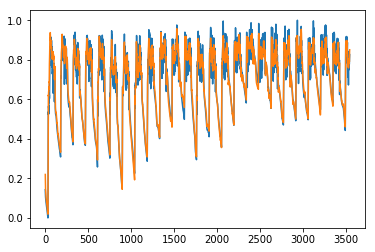

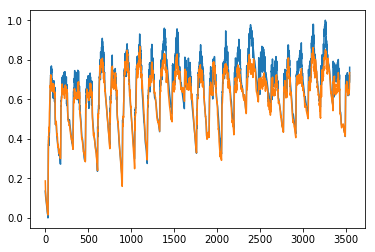

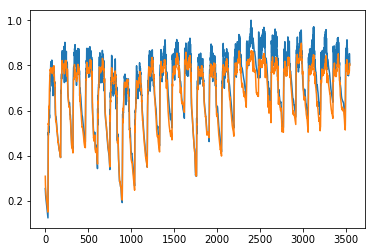

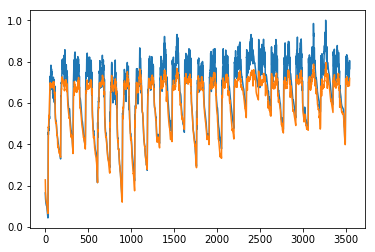

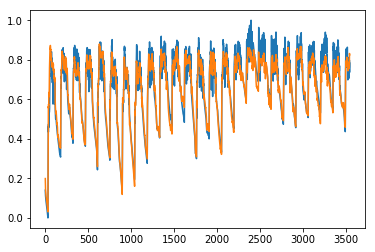

In [76]:
for key, value in Data_Jan_Resampled.items():
    print('==================',key,'======================')
    # Prepare data
    data_x_train,data_x_test,train_Y,test_Y,data_Y = data_Prepare4RNN(dataSetX_All[key],dataSetY_All[key])
    
        # Build LSTM
    (model,r2_s,y_pred2) = LSTM_model(params)
    y_pred_train = make_forecast(model,data_x_train)
    
    plt.figure()
    plt.plot(pd.DataFrame(train_Y).iloc[:,0])
    plt.plot(pd.DataFrame(y_pred_train).iloc[:,0])
    

## prototye model 2: using the final feature set selected by ARx
dataSetX_All_model2 = dataSetX_All[{'hist_1','hist_36',
 'VSupCor_flow.V_flow', 'hist_72', 'TSupCor.T', 'occup',
'Relative Humidity {%}',
 'InternalGain',
 'Atmospheric Pressure {Pa}',
 'Extraterrestrial Horizontal Radiation {Wh/m2}',
 'Extraterrestrial Direct Normal Radiation {Wh/m2}',
 'Direct Normal Radiation {Wh/m2}',
 'const',
 'Dry Bulb Temperature {C}'}]

# Prepare data
data_x_train,data_x_test,train_Y,test_Y = data_Prepare4RNN(dataSetX_All_model2,dataSetY_All)

# Build LSTM
(model,r2_s,y_pred2) = LSTM_model(params)


y_pred_train = make_forecast(model,data_x_train)

plt.figure()
plt.plot(pd.DataFrame(train_Y).iloc[:,0])
plt.plot(pd.DataFrame(y_pred_train).iloc[:,0])

##### Using genetic algorithm to tune hyperparameters

In [44]:
import random
from deap import base,creator, tools

In [45]:
creator.create('FitnessMax',base.Fitness,weights = (1.0,))
creator.create('Individual',list,fitness = creator.FitnessMax)

In [80]:
toolbox = base.Toolbox()
# attribute generator
toolbox.register('attr_int',random.randint,0,3)       #[25,50,75,100]

# structure initializers
toolbox.register("individual", tools.initRepeat, creator.Individual,toolbox.attr_int,5)

# define the population to be a list of individuals
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# the goal ('fitness') function to be maximized
def fitnessFunction(individual):
    n_neurons = [25,50,75,100]
    epochs = [10,50,100,150]
    batch_size = [10,25,50,100]
    dropout = [0,0.5,1,5] 
    optimizer = ['adam','nadam','SGD','Adagrad']
    params = {
        'n_neurons':n_neurons[individual[0]], 
        "epochs":epochs[individual[1]],     
        'batch_size':batch_size[individual[2]], 
        'dropout':dropout[individual[3]],   
        'loss':'mean_squared_error', 
        'optimizer':optimizer[individual[4]]   #['adam','nadam','RMSprop']

    }
    (model,r2,y_pred) = LSTM_model(params)
    return r2

In [81]:
#----------
# Operator registration
#----------
# register the goal / fitness function
toolbox.register("evaluate", fitnessFunction)

# register the crossover operator
toolbox.register("mate", tools.cxTwoPoint)

# register a mutation operator 
toolbox.register("mutate", tools.mutUniformInt, low = 0, up = 3 , indpb = 0.05)

# operator for selecting individuals for breeding the next
# generation: each individual of the current generation
# is replaced by the 'fittest' (best) of three individuals
# drawn randomly from the current generation.
toolbox.register("select", tools.selTournament, tournsize=3)

#----------

def main():
    random.seed(64)

    # create an initial population of 300 individuals (where
    # each individual is a list of integers)
    pop = toolbox.population(n=50)

    # CXPB  is the probability with which two individuals
    #       are crossed
    #
    # MUTPB is the probability for mutating an individual
    CXPB, MUTPB = 0.5, 0.2
    
    print("Start of evolution")
    
    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        print(fit)
        ind.fitness.values = (fit,)

    print("  Evaluated %i individuals" % len(pop))

    # Extracting all the fitnesses of 
    fits = [ind.fitness.values[0] for ind in pop]

    # Variable keeping track of the number of generations
    g = 0
    
    # Begin the evolution
    while max(fits) < 1 and g < 100:
        # A new generation
        g = g + 1
        print("-- Generation %i --" % g)
        
        # Select the next generation individuals
        offspring = toolbox.select(pop, len(pop))
        # Clone the selected individuals
        offspring = list(map(toolbox.clone, offspring))
    
        # Apply crossover and mutation on the offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):

            # cross two individuals with probability CXPB
            if random.random() < CXPB:
                toolbox.mate(child1, child2)

                # fitness values of the children
                # must be recalculated later
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:

            # mutate an individual with probability MUTPB
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
    
        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = (fit,)
        
        print("  Evaluated %i individuals" % len(invalid_ind))
        
        # The population is entirely replaced by the offspring
        pop[:] = offspring
        
        # Gather all the fitnesses in one list and print the stats
        fits = [ind.fitness.values[0] for ind in pop]
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)
    
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

Start of evolution
R^2_score is -0.017297999216355775
R^2_score is 0.7002181808298212
R^2_score is 0.840362548847909
R^2_score is -0.6589296465283763
R^2_score is 0.8036877357260366
R^2_score is 0.841677087003657
R^2_score is 0.837889083389397
R^2_score is 0.4424524526867345
R^2_score is -40.43621649905261
R^2_score is 0.8744054420026204
R^2_score is 0.8671655337785239
R^2_score is -101.972174730745
R^2_score is 0.8539055969186808
R^2_score is 0.1284213194523215
R^2_score is -99.34464944783402
R^2_score is -1.0298753972579764
R^2_score is -1.74174320872641
R^2_score is 0.8428264071884519
R^2_score is 0.617422944321671
R^2_score is 0.8607686247961945
R^2_score is 0.868982356473954
R^2_score is 0.8114768497751977
R^2_score is -61.984923213830136
R^2_score is 0.5227027290441281
R^2_score is 0.4804564575280149
R^2_score is 0.3808881168719108
R^2_score is 0.17627403907086514
R^2_score is 0.3711190422304519
R^2_score is 0.8577604655971669
R^2_score is 0.3148371449617249
R^2_score is 0.874948

R^2_score is 0.8739848169042637
R^2_score is 0.8547467812791875
R^2_score is 0.8760088269619668
R^2_score is 0.8777031370433577
R^2_score is 0.8699365547845677
R^2_score is 0.8794430002995355
R^2_score is 0.8313757445973299
R^2_score is 0.8702658120743327
R^2_score is 0.8773122665560281
R^2_score is 0.8798233384568387
R^2_score is 0.8687382774299226
  Evaluated 30 individuals
  Min 0.8313757445973299
  Max 0.8892678684568023
  Avg 0.8767372175357637
  Std 0.010348176955716926
-- Generation 7 --
R^2_score is 0.8632126639272417
R^2_score is 0.8809021887725853
R^2_score is 0.8780852688034531
R^2_score is 0.8807963544292584
R^2_score is 0.8806323946800931
R^2_score is 0.877944812715692
R^2_score is 0.8623427068136692
R^2_score is 0.8584902313333498
R^2_score is 0.8687228596720112
R^2_score is 0.8660078287464144
R^2_score is 0.881999200101477
R^2_score is 0.879511101278856
R^2_score is 0.8906637978040202
R^2_score is 0.8859452488135293
R^2_score is 0.8729370236475962
R^2_score is 0.88515151

R^2_score is 0.8771845457311357
R^2_score is 0.8858998063782736
R^2_score is 0.8801377632813547
R^2_score is 0.8872584066823426
R^2_score is 0.8674999625999742
R^2_score is 0.8787354918712255
R^2_score is 0.8614914544361852
R^2_score is 0.8768753382563831
  Evaluated 28 individuals
  Min 0.8614914544361852
  Max 0.8916868242159829
  Avg 0.8816038184900187
  Std 0.009166348631331702
-- Generation 15 --
R^2_score is 0.8628512374170989
R^2_score is 0.8690935231137795
R^2_score is 0.8756716610520565
R^2_score is 0.886922540319277
R^2_score is 0.8788049426658018
R^2_score is 0.8840927174079514
R^2_score is 0.8810578993698625
R^2_score is 0.8675073362914871
R^2_score is 0.8720141444155589
R^2_score is 0.8559310350609026
R^2_score is 0.8817576953042412
R^2_score is 0.8716789724285388
R^2_score is 0.8755059973271889
R^2_score is 0.8746748987085015
R^2_score is 0.8752238249950799
R^2_score is 0.8719245546514709
R^2_score is 0.8739846325890783
R^2_score is 0.880198043485129
R^2_score is 0.868483

R^2_score is 0.8828000322150832
R^2_score is 0.8711465205907954
R^2_score is 0.8751837343826492
R^2_score is 0.8658737394693027
R^2_score is 0.8822726159206583
  Evaluated 26 individuals
  Min 0.30353055362742587
  Max 0.8910523144453523
  Avg 0.8679045497635934
  Std 0.08118784631266192
-- Generation 23 --
R^2_score is 0.8703102053555404
R^2_score is 0.8615676040604842
R^2_score is 0.8807140356055292
R^2_score is 0.8717444835125313
R^2_score is 0.854181843267107
R^2_score is 0.8746419270064494
R^2_score is 0.8609708252339272
R^2_score is 0.8872750346487208
R^2_score is 0.88592141007298
R^2_score is 0.8676908505217583
R^2_score is 0.8801680096636112
R^2_score is 0.86245552904166
R^2_score is 0.8822230255503606
R^2_score is 0.8714000687390252
R^2_score is 0.8781799440052647
R^2_score is 0.8656549967972454
R^2_score is 0.8863776042459477
R^2_score is 0.8759301596471818
R^2_score is 0.868723414242194
R^2_score is 0.8840431695535862
R^2_score is 0.8752811667587385
R^2_score is 0.8747755642

R^2_score is 0.8614009782304934
R^2_score is 0.8745056133048609
R^2_score is 0.8823219538855069
R^2_score is 0.885967835750651
R^2_score is 0.8786521498172117
R^2_score is 0.8855972646508314
R^2_score is 0.8810953087167275
R^2_score is 0.8751434046169749
R^2_score is 0.886671791231336
R^2_score is 0.8712302463429626
R^2_score is 0.8727289078567058
R^2_score is 0.8816794470525011
R^2_score is 0.8763946406020182
R^2_score is 0.8674501714434915
R^2_score is 0.8854799398804498
R^2_score is 0.8755712398322951
R^2_score is 0.8689397775391048
R^2_score is 0.8880613604112196
  Evaluated 27 individuals
  Min 0.8614009782304934
  Max 0.8910523144453523
  Avg 0.8818431091792088
  Std 0.008832686390859401
-- Generation 31 --
R^2_score is 0.8633054204705515
R^2_score is 0.8796165580275357
R^2_score is 0.8666429663368793
R^2_score is 0.8841008658109518
R^2_score is 0.8746307162686242
R^2_score is 0.8748062277786919
R^2_score is 0.8803093361224135
R^2_score is 0.8673306075384294
R^2_score is 0.860363

R^2_score is 0.8570622472726218
R^2_score is 0.8853480058289713
R^2_score is 0.8749929103426051
R^2_score is 0.8547437237774183
  Evaluated 30 individuals
  Min 0.8547437237774183
  Max 0.8910523144453523
  Avg 0.8780596930992196
  Std 0.008461260975867925
-- Generation 38 --
R^2_score is 0.8708562260615671
R^2_score is 0.8680095455468625
R^2_score is 0.8767011232829726
R^2_score is 0.8733125694435353
R^2_score is 0.883392679127039
R^2_score is 0.88247855709292
R^2_score is 0.8778186069493034
R^2_score is 0.8699008627214062
R^2_score is 0.8516497121028711
R^2_score is 0.8723640780987272
R^2_score is 0.8760283069956822
R^2_score is 0.876367504025482
R^2_score is 0.8761019872943071
R^2_score is 0.8698588252901418
R^2_score is 0.8778322601654052
R^2_score is 0.8791188225648161
R^2_score is 0.8684608683159024
R^2_score is 0.8661428617507564
R^2_score is 0.8746220798590265
R^2_score is 0.8691697624800417
R^2_score is 0.8788919100860194
R^2_score is 0.8732828564469153
R^2_score is 0.87837325

R^2_score is 0.8649941384934996
R^2_score is -24.49285861889052
R^2_score is 0.8852710942829383
R^2_score is 0.8802963536369951
R^2_score is 0.8760438560277153
R^2_score is 0.873956899210237
R^2_score is 0.8650856082619753
R^2_score is 0.8776500218459231
R^2_score is 0.8838689994516672
R^2_score is 0.8701311641279659
R^2_score is 0.8782798247534314
R^2_score is 0.8837344120364335
R^2_score is 0.8655893070917062
R^2_score is 0.8746976828317421
R^2_score is 0.8752356203421111
R^2_score is 0.8622282711314596
R^2_score is 0.8835018712399595
R^2_score is 0.8763372048268463
R^2_score is 0.8863188233039708
R^2_score is 0.8422073374333496
R^2_score is 0.8737373146369433
R^2_score is 0.8877133238308988
R^2_score is 0.8475074691687476
  Evaluated 30 individuals
  Min -24.49285861889052
  Max 0.8910523144453523
  Avg 0.36985155408214804
  Std 3.5518289968126564
-- Generation 46 --
R^2_score is 0.8593676803335561
R^2_score is 0.872440630794632
R^2_score is 0.8776797109113174
R^2_score is 0.8829032

R^2_score is 0.8689057192314025
R^2_score is 0.8761538792433161
R^2_score is 0.8893135128167678
R^2_score is 0.8633143499595767
R^2_score is 0.8520775606429836
R^2_score is 0.8667500477749025
R^2_score is 0.8639523920460885
R^2_score is 0.8688231009425214
R^2_score is 0.8815471296901958
R^2_score is 0.8664593744460167
R^2_score is 0.8646607718802595
R^2_score is 0.861297809510148
R^2_score is 0.8635651221186228
R^2_score is 0.8651344697610713
R^2_score is 0.8826007557527445
R^2_score is 0.8736924431177144
R^2_score is 0.891103453561124
R^2_score is 0.8751860364480297
  Evaluated 33 individuals
  Min 0.8457891144117002
  Max 0.891103453561124
  Avg 0.874334126779831
  Std 0.009675989265876032
-- Generation 53 --
R^2_score is 0.8682349703574429
R^2_score is 0.8718727625524187
R^2_score is 0.8619554643010184
R^2_score is 0.8682814891144766
R^2_score is 0.8837251473874044
R^2_score is 0.8780502934431501
R^2_score is 0.8822358407941527
R^2_score is 0.8765665510000072
R^2_score is 0.86617244

R^2_score is 0.8786535341506894
R^2_score is 0.8811611888275596
R^2_score is 0.8691175504107609
R^2_score is 0.8771381168246108
R^2_score is 0.8618519303122083
R^2_score is 0.8780887390266464
R^2_score is 0.8859412535201764
R^2_score is 0.8824343583717438
R^2_score is 0.8661247601762512
R^2_score is 0.8615625981240007
R^2_score is 0.8647962846044887
R^2_score is 0.8844329824644728
R^2_score is 0.8657776296127981
R^2_score is 0.857829021794566
R^2_score is 0.8723483379110701
R^2_score is 0.8728110242051006
  Evaluated 26 individuals
  Min 0.8526443989419482
  Max 0.8894950583466977
  Avg 0.8783617341273657
  Std 0.009570891507833966
-- Generation 61 --
R^2_score is 0.8843027226517637
R^2_score is 0.8812995424691404
R^2_score is 0.8770034646412329
R^2_score is 0.8770820045415744
R^2_score is 0.883587678920307
R^2_score is 0.8736988307932745
R^2_score is 0.8613468918845131
R^2_score is 0.88755351846777
R^2_score is 0.8613740876551109
R^2_score is 0.8644848290329101
R^2_score is 0.88438053

R^2_score is 0.8772621354733005
R^2_score is 0.8397811323308677
R^2_score is 0.8722503899141991
R^2_score is 0.8777267707344641
R^2_score is 0.8581636993940459
  Evaluated 37 individuals
  Min 0.8397811323308677
  Max 0.8894950583466977
  Avg 0.8744374489018536
  Std 0.009690242914313954
-- Generation 68 --
R^2_score is 0.8635581738978688
R^2_score is 0.8801055755218675
R^2_score is 0.8678958394143894
R^2_score is 0.8732276512021322
R^2_score is 0.8758445003186087
R^2_score is 0.8719443372854242
R^2_score is 0.8719043993045037
R^2_score is 0.878490604476271
R^2_score is 0.8642560314944814
R^2_score is 0.8634211561427899
R^2_score is 0.8660744605202059
R^2_score is 0.8777350109285121
R^2_score is 0.8784300662500958
R^2_score is 0.8012224521697199
R^2_score is 0.8679661942592604
R^2_score is 0.8732416703404464
R^2_score is 0.8660788564615575
R^2_score is 0.872063033177858
R^2_score is 0.8754330001033255
R^2_score is 0.8775002443472835
R^2_score is 0.8672045807162672
R^2_score is 0.854641

R^2_score is 0.8651871871362331
R^2_score is 0.8813048637334059
R^2_score is 0.8654898491292634
R^2_score is 0.8688825036544263
R^2_score is 0.8740473266667477
R^2_score is 0.8775848598241294
R^2_score is 0.8834051033523972
R^2_score is 0.8824587607189212
R^2_score is 0.8723516396910753
R^2_score is 0.8739702852356181
R^2_score is 0.8880542363920606
R^2_score is 0.868991818545033
R^2_score is 0.8499569400815332
R^2_score is 0.8623321519981869
R^2_score is 0.8375284137119591
R^2_score is -17.050244133970292
  Evaluated 24 individuals
  Min -17.050244133970292
  Max 0.8917211952604841
  Avg 0.520918584126154
  Std 2.5101931382764073
-- Generation 76 --
R^2_score is 0.8729072526426855
R^2_score is 0.8742475468317223
R^2_score is 0.8870022343716962
R^2_score is 0.8531277337587965
R^2_score is 0.8859640326797169
R^2_score is 0.8650469963824113
R^2_score is 0.8758399475317236
R^2_score is 0.8706601658160731
R^2_score is 0.870771207087376
R^2_score is 0.8666809803055385
R^2_score is 0.8679145

R^2_score is 0.8770107680011685
R^2_score is 0.8703384949192893
R^2_score is 0.8794187522854309
R^2_score is 0.8805638710321654
R^2_score is 0.8808849621459269
R^2_score is 0.8882755626981311
R^2_score is 0.8819337436330017
R^2_score is 0.8893230091587047
R^2_score is 0.8672481703539247
R^2_score is 0.8732216068445666
R^2_score is 0.874574441932763
R^2_score is 0.8664606968681878
R^2_score is 0.86652325404337
R^2_score is 0.8770637730632971
R^2_score is 0.8674067458791634
R^2_score is 0.8799675605689298
R^2_score is 0.8579626404037304
R^2_score is 0.8856706212849043
R^2_score is 0.8709534402451881
R^2_score is 0.888522999756799
R^2_score is 0.8665309314337608
R^2_score is 0.8641135779627317
R^2_score is 0.875382157256006
R^2_score is 0.8782334972330393
R^2_score is 0.8710640699494724
R^2_score is 0.8777887049401243
R^2_score is 0.8366869448089683
R^2_score is 0.8857051433367378
R^2_score is 0.8787649819369205
  Evaluated 34 individuals
  Min 0.8366869448089683
  Max 0.8910814281412798


R^2_score is 0.867663121762502
  Evaluated 28 individuals
  Min 0.8308059831826048
  Max 0.8912715422321205
  Avg 0.8784755274661107
  Std 0.010091394987459342
-- Generation 90 --
R^2_score is 0.8629680408221692
R^2_score is 0.8788080401528938
R^2_score is 0.8663483818171644
R^2_score is 0.8786822824270644
R^2_score is 0.8803705279532358
R^2_score is 0.886180880882181
R^2_score is 0.8693761269537482
R^2_score is 0.8807918248944949
R^2_score is 0.8711310375553007
R^2_score is 0.8817893056953349
R^2_score is 0.8661604343244488
R^2_score is 0.8704388194438353
R^2_score is 0.877305048775381
R^2_score is 0.8718514081700703
R^2_score is 0.26506609159133954
R^2_score is 0.8773584539224416
R^2_score is 0.8679827681992257
R^2_score is 0.8819810725612315
R^2_score is 0.8778612891123893
R^2_score is 0.867734951218637
R^2_score is 0.8781585155769998
R^2_score is 0.8674328023458537
R^2_score is 0.8759866353271846
R^2_score is 0.8639621646362345
R^2_score is 0.8659637394507143
R^2_score is 0.8641634

R^2_score is 0.8737354468913328
R^2_score is 0.869804222235657
R^2_score is 0.8843299072299049
R^2_score is 0.8821819625396865
  Evaluated 26 individuals
  Min 0.8208369572023423
  Max 0.8916834475972095
  Avg 0.8811515631212501
  Std 0.011872337140788475
-- Generation 98 --
R^2_score is 0.8781688068513269
R^2_score is 0.8735430265713344
R^2_score is 0.8799229298801352
R^2_score is 0.87580272529868
R^2_score is 0.8768247493237312
R^2_score is 0.8699717728092782
R^2_score is 0.8611443130786318
R^2_score is 0.8742951412275571
R^2_score is 0.8672394723985034
R^2_score is 0.86884486153259
R^2_score is 0.8791899454043371
R^2_score is 0.8756161014320785
R^2_score is 0.8699317741157665
R^2_score is 0.8686379355640377
R^2_score is 0.8887959691476548
R^2_score is 0.8738110356606503
R^2_score is 0.8760312398967963
R^2_score is 0.8812903011586516
R^2_score is 0.8554200646094628
R^2_score is 0.86736413587841
R^2_score is 0.8695343940324566
R^2_score is 0.8837746979192623
R^2_score is 0.87491267943

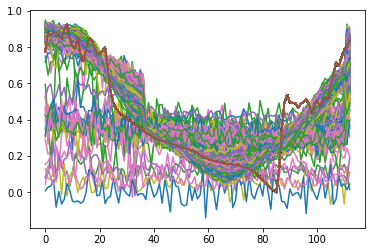

In [82]:
if __name__ == "__main__":
    main()

In [ ]:
data

In [83]:
n_neurons = [25,50,75,100]
epochs = [10,50,100,150]
batch_size = [10,25,50,100]
dropout = [0,0.5,1,5] 
optimizer = ['adam','nadam','SGD','Adagrad']

In [88]:
params

{'n_neurons': 50,
 'epochs': 100,
 'batch_size': 10,
 'dropout': 0.5,
 'loss': 'mean_squared_error',
 'optimizer': 'adam'}

In [90]:
params['n_neurons'] = 75
params['epochs'] = 150
params['batch_size']=50
params['dropout']=0
params['optimizer']='nadam'

R^2_score is 0.8864413571402873


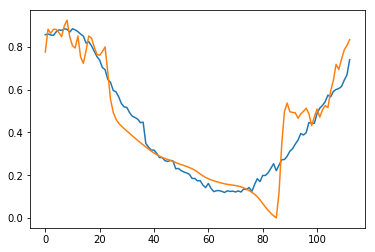

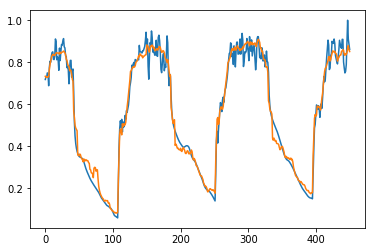

In [92]:
## prototye model 2: using the final feature set selected by ARx
dataSetX_All_model2 = dataSetX_All[{'hist_1','hist_36',
 'VSupCor_flow.V_flow', 'hist_72', 'TSupCor.T', 'occup',
'Relative Humidity {%}',
 'InternalGain',
 'Atmospheric Pressure {Pa}',
 'Extraterrestrial Horizontal Radiation {Wh/m2}',
 'Extraterrestrial Direct Normal Radiation {Wh/m2}',
 'Direct Normal Radiation {Wh/m2}',
 'const',
 'Dry Bulb Temperature {C}'}]

# Prepare data
data_x_train,data_x_test,train_Y,test_Y = data_Prepare4RNN(dataSetX_All_model2,dataSetY_All)

# Build LSTM
(model,r2_s,y_pred2) = LSTM_model(params)


y_pred_train = make_forecast(model,data_x_train)

plt.figure()
plt.plot(pd.DataFrame(train_Y).iloc[:,0])
plt.plot(pd.DataFrame(y_pred_train).iloc[:,0])

In [307]:
tools.selBest(pop, 1)[0]

NameError: name 'pop' is not defined

In [33]:
# set parameters
batch_size = 30


In [ ]:
model = Sequential()
mode.add()

**Evaluation metrics and prediction function**

<hr style="border-color:royalblue;background-color:royalblue;height:1px;">
<div style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
[Back to Contents](#toc)
</div>